In [44]:
#How to use a Public Application Program Interface (API)

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15', #'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '239d66ae-2830-464e-b49f-2bc0c2ddf8a0',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-12-13T12:20:46.207Z', 'error_code': 0, 'error_message': None, 'elapsed': 14, 'credit_count': 1, 'notice': None, 'total_count': 8892}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10616, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [45]:
#Normalize the data

import pandas as pd
pd.set_option('display.max_columns', None)  #allows to see all columns 
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')

df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10616,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19568725.00000,19568725.00000,False,NaN,1,NaN,NaN,None,2023-12-13T12:19:00.000Z,41134.29609,23525624941.68558,-24.95530,-0.11689,-1.50637,-6.58435,11.91615,53.14616,55.57639,804945728159.22314,52.17470,863820217788.52002,None,2023-12-13T12:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-13 20:20:46.631230
1,1027,Ethereum,ETH,ethereum,8030,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120211761.82614,120211761.82614,True,NaN,2,NaN,NaN,None,2023-12-13T12:19:00.000Z,2178.25576,12138085880.89060,-11.09380,-0.09903,-1.66453,-3.59312,6.50802,40.84000,34.15944,261851962894.24344,16.96280,261851962894.23999,None,2023-12-13T12:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-13 20:20:46.631230
2,825,Tether USDt,USDT,tether,67993,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,90653779562.34685,93609080552.59224,True,NaN,3,NaN,NaN,None,2023-12-13T12:18:00.000Z,0.99941,49123897082.54378,-16.65200,-0.00283,-0.05805,-0.06709,-0.10171,-0.05260,-0.10506,90600344732.45607,5.87250,93553903754.45000,None,2023-12-13T12:18:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-13 20:20:46.631230
3,1839,BNB,BNB,bnb,1839,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151696210.87931,151696210.87931,False,NaN,4,NaN,NaN,None,2023-12-13T12:18:00.000Z,250.41918,1354855929.96588,-5.70590,-0.36299,-0.47507,8.73078,2.40133,21.61892,17.72887,37987640639.58219,2.46230,37987640639.58000,None,2023-12-13T12:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-13 20:20:46.631230
4,52,XRP,XRP,xrp,1170,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53957460767.00000,99988170772.00000,False,NaN,5,NaN,NaN,None,2023-12-13T12:19:00.000Z,0.60360,1468162246.35417,-13.28000,-0.20019,-2.83326,-3.01901,-7.12603,24.23817,24.93580,32568848776.30917,2.10980,60360232511.59000,None,2023-12-13T12:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-13 20:20:46.631230
5,5426,Solana,SOL,solana,559,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,426405655.73887,564703644.20376,True,NaN,6,NaN,NaN,None,2023-12-13T12:19:00.000Z,66.05177,2339534018.77035,-17.03770,-0.42266,-6.65742,4.36426,16.15818,201.41897,249.93192,28164849037.15330,1.82450,37299676201.92000,None,2023-12-13T12:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-13 20:20:46.631230
6,3408,USDC,USDC,usd-coin,15509,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,24091599893.88884,24091599893.88884,False,NaN,7,NaN,NaN,None,2023-12-13T12:18:00.000Z,1.00004,6293798822.09142,-15.79500,-0.01128,-0.02417,0.00494,0.00987,-0.00656,-0.03680,24092663901.17124,1.56070,24092663901.17000,None,2023-12-13T12:18:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-12-13 20:20:46.631230
7,2010,Cardano,ADA,cardano,1000,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35327642868.01500,36439975031.08700,False,NaN,8,NaN,NaN,None,2023-12-13T12:18:00.000Z,0.57959,1043969788.04225,-18.86190,0.19502,-2.42996,33.20288,57.91226,135.32192,132.28255,20475452776.02538,1.32720,26081428029.70000,None,2023-12-1

In [46]:
#Start to automate API by defining a function

def api_runner():
    global df #make datafram a global variable
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start':'1',
        'limit':'15',
        'convert':'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '239d66ae-2830-464e-b49f-2bc0c2ddf8a0',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    #Need to append incoming data
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df._append(df2)
        

In [47]:
#Create script to automatically run automation

import os 
from time import time
from time import sleep

for i in range(332): #max runs per day because of limits set in crypto website
    api_runner()
    print('API runner completed.')
    sleep(60) #sleep every 1min
exit()

API runner completed.


KeyboardInterrupt: 

In [48]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10616,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19568725.00000,19568725.00000,False,NaN,1,NaN,NaN,None,2023-12-13T12:19:00.000Z,41134.29609,23525624941.68558,-24.95530,-0.11689,-1.50637,-6.58435,11.91615,53.14616,55.57639,804945728159.22314,52.17470,863820217788.52002,None,2023-12-13T12:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-13 20:20:46.631230
1,1027,Ethereum,ETH,ethereum,8030,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120211761.82614,120211761.82614,True,NaN,2,NaN,NaN,None,2023-12-13T12:19:00.000Z,2178.25576,12138085880.89060,-11.09380,-0.09903,-1.66453,-3.59312,6.50802,40.84000,34.15944,261851962894.24344,16.96280,261851962894.23999,None,2023-12-13T12:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-13 20:20:46.631230
2,825,Tether USDt,USDT,tether,67993,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,90653779562.34685,93609080552.59224,True,NaN,3,NaN,NaN,None,2023-12-13T12:18:00.000Z,0.99941,49123897082.54378,-16.65200,-0.00283,-0.05805,-0.06709,-0.10171,-0.05260,-0.10506,90600344732.45607,5.87250,93553903754.45000,None,2023-12-13T12:18:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-13 20:20:46.631230
3,1839,BNB,BNB,bnb,1839,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151696210.87931,151696210.87931,False,NaN,4,NaN,NaN,None,2023-12-13T12:18:00.000Z,250.41918,1354855929.96588,-5.70590,-0.36299,-0.47507,8.73078,2.40133,21.61892,17.72887,37987640639.58219,2.46230,37987640639.58000,None,2023-12-13T12:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-13 20:20:46.631230
4,52,XRP,XRP,xrp,1170,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53957460767.00000,99988170772.00000,False,NaN,5,NaN,NaN,None,2023-12-13T12:19:00.000Z,0.60360,1468162246.35417,-13.28000,-0.20019,-2.83326,-3.01901,-7.12603,24.23817,24.93580,32568848776.30917,2.10980,60360232511.59000,None,2023-12-13T12:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-13 20:20:46.631230
5,5426,Solana,SOL,solana,559,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,426405655.73887,564703644.20376,True,NaN,6,NaN,NaN,None,2023-12-13T12:19:00.000Z,66.05177,2339534018.77035,-17.03770,-0.42266,-6.65742,4.36426,16.15818,201.41897,249.93192,28164849037.15330,1.82450,37299676201.92000,None,2023-12-13T12:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-13 20:20:46.631230
6,3408,USDC,USDC,usd-coin,15509,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,24091599893.88884,24091599893.88884,False,NaN,7,NaN,NaN,None,2023-12-13T12:18:00.000Z,1.00004,6293798822.09142,-15.79500,-0.01128,-0.02417,0.00494,0.00987,-0.00656,-0.03680,24092663901.17124,1.56070,24092663901.17000,None,2023-12-13T12:18:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-12-13 20:20:46.631230
7,2010,Cardano,ADA,cardano,1000,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35327642868.01500,36439975031.08700,False,NaN,8,NaN,NaN,None,2023-12-13T12:18:00.000Z,0.57959,1043969788.04225,-18.86190,0.19502,-2.42996,33.20288,57.91226,135.32192,132.28255,20475452776.02538,1.32720,26081428029.70000,None,2023-12-1

In [49]:
#Creating and appending to a CSV File and not in this Jupyter Notebook
#Start to automate API by defining a function

def api_runner():
    global df #make datafram a global variable
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start':'1',
        'limit':'15',
        'convert':'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '239d66ae-2830-464e-b49f-2bc0c2ddf8a0',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)


    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
 
        
    if not os.path.isfile(r'C:\Users\Kirby Portugaleza\OneDrive\Desktop\Pyhton Projects\API.csv'):      #If CSV does not exist then
        df.to_csv(r'C:\Users\Kirby Portugaleza\OneDrive\Desktop\Pyhton Projects\API.csv', header='column_names')
    else:        #append the data to CSV
        df.to_csv(r'C:\Users\Kirby Portugaleza\OneDrive\Desktop\Pyhton Projects\API.csv', mode = 'a', header = False)

In [50]:
fd=r'C:\Users\Kirby Portugaleza\OneDrive\Desktop\Pyhton Projects\API.csv'
os.path.exists(fd)

False

In [51]:
#Create script to automatically run automation

import os 
from time import time
from time import sleep

for i in range(332): #max runs per day because of limits set in crypto website
    api_runner()
    print('API runner completed.')
    sleep(60) #sleep every 1min
exit()

API runner completed.
API runner completed.
API runner completed.
API runner completed.
API runner completed.


KeyboardInterrupt: 

In [52]:
df3 = pd.read_csv(r'C:\Users\Kirby Portugaleza\OneDrive\Desktop\Pyhton Projects\API.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10616,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19568725.00000,19568725.00000,False,NaN,1,NaN,NaN,NaN,2023-12-13T12:21:00.000Z,41139.21198,23534318453.54076,-24.93200,-0.02411,-1.58932,-6.36714,12.08236,53.17054,55.54695,805041925873.08569,52.07320,863923451493.89001,NaN,2023-12-13T12:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-13 20:22:20.618671
1,1,1027,Ethereum,ETH,ethereum,8030,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120211761.82614,120211761.82614,True,NaN,2,NaN,NaN,NaN,2023-12-13T12:21:00.000Z,2177.18951,12139044374.46509,-11.10440,-0.07824,-1.81941,-3.48141,6.55209,40.77861,34.02039,261723786602.52927,16.95450,261723786602.53000,NaN,2023-12-13T12:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-13 20:22:20.618671
2,2,825,Tether USDt,USDT,tether,67993,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,90653779562.34685,93609080552.59224,True,NaN,3,NaN,NaN,NaN,2023-12-13T12:20:00.000Z,0.99937,49143325721.85496,-16.54480,-0.04644,-0.05377,-0.10842,-0.10983,-0.05763,-0.12061,90596871376.25575,5.87230,93550317167.31000,NaN,2023-12-13T12:20:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-13 20:22:20.618671
3,3,1839,BNB,BNB,bnb,1839,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,151696210.87931,151696210.87931,False,NaN,4,NaN,NaN,NaN,2023-12-13T12:20:00.000Z,250.54159,1355161276.24440,-5.36730,-0.26468,-0.42368,8.82613,2.48875,21.70968,17.92104,38006210317.62294,2.46350,38006210317.62000,NaN,2023-12-13T12:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-13 20:22:20.618671
4,4,52,XRP,XRP,xrp,1170,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,53957460767.00000,99988170772.00000,False,NaN,5,NaN,NaN,NaN,2023-12-13T12:21:00.000Z,0.60366,1468494262.91278,-13.30830,-0.17838,-2.82605,-3.00765,-7.10056,24.25929,24.95942,32572185905.25736,2.11000,60366417252.12000,NaN,2023-12-13T12:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-13 20:22:20.618671
5,5,5426,Solana,SOL,solana,559,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,426405655.73887,564703644.20376,True,NaN,6,NaN,NaN,NaN,2023-12-13T12:20:00.000Z,66.06658,2339569505.40074,-17.04500,-0.40840,-6.64781,4.41291,16.23063,201.50611,250.10562,28171165308.40916,1.82490,37308041056.72000,NaN,2023-12-13T12:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-13 20:22:20.618671
6,6,3408,USDC,USDC,usd-coin,15509,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,24091599893.88884,24091599893.88884,False,NaN,7,NaN,NaN,NaN,2023-12-13T12:20:00.000Z,1.00004,6293128255.01208,-15.84210,-0.04039,-0.01477,-0.02468,0.00399,-0.00460,-0.03482,24092609262.48445,1.56070,24092609262.48000,NaN,2023-12-13T12:20:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-12-13 20:22:20.618671
7,7,2010,Cardano,ADA,cardano,1000,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35327642868.01500,36439975031.08700,False,NaN,8,NaN,NaN,NaN,2023-12-13T12:20:00.000Z,0.58289,1047337600.04573,-18.67390,0.03421,-2.03053,33.99439,58.90782,136.68003,133.88467,20591995153.55811,1.33470,26229878550.69000,N

In [53]:
#Changing the scientific notations

pd.set_option('display.float_format', lambda x: '%.5f' %x)
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10616,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19568725.00000,19568725.00000,False,NaN,1,NaN,NaN,NaN,2023-12-13T12:21:00.000Z,41139.21198,23534318453.54076,-24.93200,-0.02411,-1.58932,-6.36714,12.08236,53.17054,55.54695,805041925873.08569,52.07320,863923451493.89001,NaN,2023-12-13T12:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-13 20:22:20.618671
1,1,1027,Ethereum,ETH,ethereum,8030,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120211761.82614,120211761.82614,True,NaN,2,NaN,NaN,NaN,2023-12-13T12:21:00.000Z,2177.18951,12139044374.46509,-11.10440,-0.07824,-1.81941,-3.48141,6.55209,40.77861,34.02039,261723786602.52927,16.95450,261723786602.53000,NaN,2023-12-13T12:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-13 20:22:20.618671
2,2,825,Tether USDt,USDT,tether,67993,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,90653779562.34685,93609080552.59224,True,NaN,3,NaN,NaN,NaN,2023-12-13T12:20:00.000Z,0.99937,49143325721.85496,-16.54480,-0.04644,-0.05377,-0.10842,-0.10983,-0.05763,-0.12061,90596871376.25575,5.87230,93550317167.31000,NaN,2023-12-13T12:20:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-13 20:22:20.618671
3,3,1839,BNB,BNB,bnb,1839,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,151696210.87931,151696210.87931,False,NaN,4,NaN,NaN,NaN,2023-12-13T12:20:00.000Z,250.54159,1355161276.24440,-5.36730,-0.26468,-0.42368,8.82613,2.48875,21.70968,17.92104,38006210317.62294,2.46350,38006210317.62000,NaN,2023-12-13T12:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-13 20:22:20.618671
4,4,52,XRP,XRP,xrp,1170,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,53957460767.00000,99988170772.00000,False,NaN,5,NaN,NaN,NaN,2023-12-13T12:21:00.000Z,0.60366,1468494262.91278,-13.30830,-0.17838,-2.82605,-3.00765,-7.10056,24.25929,24.95942,32572185905.25736,2.11000,60366417252.12000,NaN,2023-12-13T12:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-13 20:22:20.618671
5,5,5426,Solana,SOL,solana,559,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,426405655.73887,564703644.20376,True,NaN,6,NaN,NaN,NaN,2023-12-13T12:20:00.000Z,66.06658,2339569505.40074,-17.04500,-0.40840,-6.64781,4.41291,16.23063,201.50611,250.10562,28171165308.40916,1.82490,37308041056.72000,NaN,2023-12-13T12:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-13 20:22:20.618671
6,6,3408,USDC,USDC,usd-coin,15509,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,24091599893.88884,24091599893.88884,False,NaN,7,NaN,NaN,NaN,2023-12-13T12:20:00.000Z,1.00004,6293128255.01208,-15.84210,-0.04039,-0.01477,-0.02468,0.00399,-0.00460,-0.03482,24092609262.48445,1.56070,24092609262.48000,NaN,2023-12-13T12:20:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-12-13 20:22:20.618671
7,7,2010,Cardano,ADA,cardano,1000,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35327642868.01500,36439975031.08700,False,NaN,8,NaN,NaN,NaN,2023-12-13T12:20:00.000Z,0.58289,1047337600.04573,-18.67390,0.03421,-2.03053,33.99439,58.90782,136.68003,133.88467,20591995153.55811,1.33470,26229878550.69000,N

In [54]:
#Group By CSV data

df4 = df3.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.09643,-1.53589,-6.28642,12.14349,53.29525,55.47584
Ethereum,0.00909,-1.80568,-3.45112,6.60752,40.84031,33.93132
Tether USDt,-0.01963,-0.06651,-0.08666,-0.10420,-0.05426,-0.08395
BNB,-0.23063,-0.45893,8.85264,2.54213,21.65577,17.84539
XRP,-0.08478,-2.86088,-2.95801,-6.89643,24.29078,24.90075
Solana,-0.38329,-6.79832,4.60654,16.76558,201.20339,249.48331
USDC,-0.01575,-0.03222,-0.00162,0.01129,0.00100,-0.02156
Cardano,-0.08326,-2.14868,34.04935,59.06996,136.55868,133.77186
Avalanche,-0.00918,-10.36309,41.14190,105.69598,295.29086,288.53269


In [55]:
#Stacking and Transforming data

df5 = df4.stack()
df5 = df5.to_frame(name = 'values')
df5 = df5.reset_index()
df5 = df5.rename(columns = {'level_1': 'percent_change'})

df5

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.09643
1,Bitcoin,quote.USD.percent_change_24h,-1.53589
2,Bitcoin,quote.USD.percent_change_7d,-6.28642
3,Bitcoin,quote.USD.percent_change_30d,12.14349
4,Bitcoin,quote.USD.percent_change_60d,53.29525
5,Bitcoin,quote.USD.percent_change_90d,55.47584
6,Ethereum,quote.USD.percent_change_1h,0.00909
7,Ethereum,quote.USD.percent_change_24h,-1.80568
8,Ethereum,quote.USD.percent_change_7d,-3.45112
9,Ethereum,quote.USD.percent_change_30d,6.60752


In [56]:
df5['percent_change'] = df5['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 
                                                       'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])
df5

,name,percent_change,values
0,Bitcoin,1h,0.09643
1,Bitcoin,24h,-1.53589
2,Bitcoin,7d,-6.28642
3,Bitcoin,30d,12.14349
4,Bitcoin,60d,53.29525
5,Bitcoin,90d,55.47584
6,Ethereum,1h,0.00909
7,Ethereum,24h,-1.80568
8,Ethereum,7d,-3.45112
9,Ethereum,30d,6.60752


c:\Users\Kirby Portugaleza\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


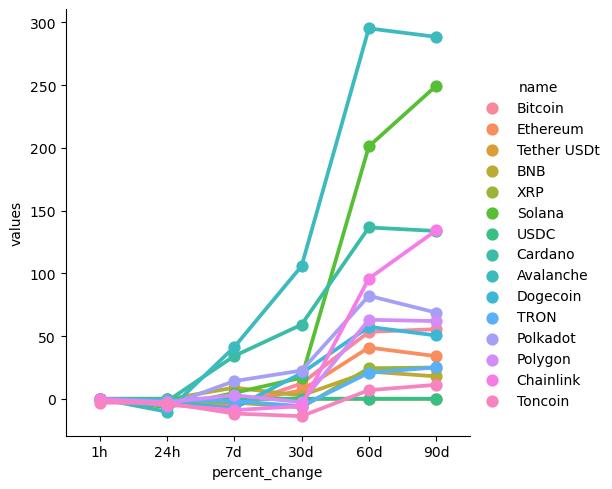

In [57]:
#Data Visualization

import seaborn as sns
from matplotlib import pyplot as plt

sns.catplot(x='percent_change', y = 'values', hue = 'name', data = df5, kind = 'point')

In [58]:
df6 = df3[['name', 'quote.USD.price', 'timestamp']]
df6

,name,quote.USD.price,timestamp
0,Bitcoin,41139.21198,2023-12-13 20:22:20.618671
1,Ethereum,2177.18951,2023-12-13 20:22:20.618671
2,Tether USDt,0.99937,2023-12-13 20:22:20.618671
3,BNB,250.54159,2023-12-13 20:22:20.618671
4,XRP,0.60366,2023-12-13 20:22:20.618671
5,Solana,66.06658,2023-12-13 20:22:20.618671
6,USDC,1.00004,2023-12-13 20:22:20.618671
7,Cardano,0.58289,2023-12-13 20:22:20.618671
8,Avalanche,36.33684,2023-12-13 20:22:20.618671
9,Dogecoin,0.09269,2023-12-13 20:22:20.618671


C:\Users\Kirby Portugaleza\AppData\Local\Temp\ipykernel_18264\359093091.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)


,name,quote.USD.price,timestamp
9,Dogecoin,0.09269,2023-12-13 20:22:20.618671
24,Dogecoin,0.09263,2023-12-13 20:23:21.954261
39,Dogecoin,0.09262,2023-12-13 20:24:23.197198
54,Dogecoin,0.09272,2023-12-13 20:25:24.942037
69,Dogecoin,0.09272,2023-12-13 20:26:27.410851


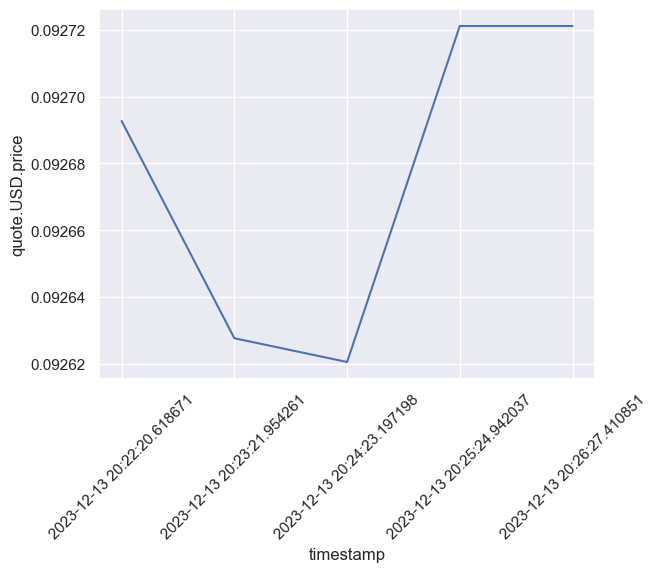

In [63]:
#Just look at Dogecoin

df7 = df6.query("name == 'Dogecoin'")
sns.set_theme(style = 'darkgrid')
my_plot = sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df7)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)
df7